# Tic-Tac-Toe Endgame Data Set



### Dataset Information

Dataset encodes the complete set of possible board configurations at the end of tic-tac-toe games, where 'x' is assumed to have played first.

Target concept: "win for x" (i.e., true when 'x' has one of 8 possible ways to create a 'three-in-a-row')






**Attribute Information**

x = player x has taken, o = player o has taken, b = blank

Class: positive(1) when x wins, negative(0) when x loses

1. top-left-square: {x,o,b}
2. top-middle-square: {x,o,b}
3. top-right-square: {x,o,b}
4. middle-left-square: {x,o,b}
5. middle-middle-square: {x,o,b}
6. middle-right-square: {x,o,b}
7. bottom-left-square: {x,o,b}
8. bottom-middle-square: {x,o,b}
9. bottom-right-square: {x,o,b}
10. Class: {positive,negative}


---




In [277]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
import itertools

from prettytable import PrettyTable

from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve, confusion_matrix, auc, log_loss
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

In [278]:
df = pd.read_csv('tic-tac-toe.data')
df.head()

,x,x.1,x.2,x.3,o,o.1,x.4,o.2,o.3,positive
0,x,x,x,x,o,o,o,x,o,positive
1,x,x,x,x,o,o,o,o,x,positive
2,x,x,x,x,o,o,o,b,b,positive
3,x,x,x,x,o,o,b,o,b,positive
4,x,x,x,x,o,o,b,b,o,positive


In [279]:
df.shape
df.info()
df.isnull().sum().sort_values(ascending=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 957 entries, 0 to 956
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   x         957 non-null    object
 1   x.1       957 non-null    object
 2   x.2       957 non-null    object
 3   x.3       957 non-null    object
 4   o         957 non-null    object
 5   o.1       957 non-null    object
 6   x.4       957 non-null    object
 7   o.2       957 non-null    object
 8   o.3       957 non-null    object
 9   positive  957 non-null    object
dtypes: object(10)
memory usage: 74.9+ KB


x           0
x.1         0
x.2         0
x.3         0
o           0
o.1         0
x.4         0
o.2         0
o.3         0
positive    0
dtype: int64

In [280]:
#rename columns
df.rename(columns={'x': 'TLS',
                   'x.1':'TMS',
                   'x.2':'TRS',
                   'x.3':'MLS',
                   'o':'MMS',
                   'o.1':'MRS', 
                   'x.4':'BLS',
                   'o.2':'BMS',
                   'o.3':'BRS',
                   'positive': 'classes'}, inplace=True)
df.head()

,TLS,TMS,TRS,MLS,MMS,MRS,BLS,BMS,BRS,classes
0,x,x,x,x,o,o,o,x,o,positive
1,x,x,x,x,o,o,o,o,x,positive
2,x,x,x,x,o,o,o,b,b,positive
3,x,x,x,x,o,o,b,o,b,positive
4,x,x,x,x,o,o,b,b,o,positive


After Encoding:

x = 2, o = 1, b = 0

Classes:

0 = negative, 1 = positive

In [281]:
#converting into numerical data
le = LabelEncoder()

df['TLS'] = le.fit_transform(df['TLS'])
df['TMS'] = le.fit_transform(df['TMS'])
df['TRS'] = le.fit_transform(df['TRS'])
df['MLS'] = le.fit_transform(df['MLS'])
df['MMS'] = le.fit_transform(df['MMS'])
df['MRS'] = le.fit_transform(df['MRS'])
df['BLS'] = le.fit_transform(df['BLS'])
df['BMS'] = le.fit_transform(df['BMS'])
df['BRS'] = le.fit_transform(df['BRS'])
df['classes'] = le.fit_transform(df['classes'])

df.head()

,TLS,TMS,TRS,MLS,MMS,MRS,BLS,BMS,BRS,classes
0,2,2,2,2,1,1,1,2,1,1
1,2,2,2,2,1,1,1,1,2,1
2,2,2,2,2,1,1,1,0,0,1
3,2,2,2,2,1,1,0,1,0,1
4,2,2,2,2,1,1,0,0,1,1


In [282]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 957 entries, 0 to 956
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   TLS      957 non-null    int64
 1   TMS      957 non-null    int64
 2   TRS      957 non-null    int64
 3   MLS      957 non-null    int64
 4   MMS      957 non-null    int64
 5   MRS      957 non-null    int64
 6   BLS      957 non-null    int64
 7   BMS      957 non-null    int64
 8   BRS      957 non-null    int64
 9   classes  957 non-null    int64
dtypes: int64(10)
memory usage: 74.9 KB


## Classification

#### Creating training and testing dataset

In [283]:
x_features = ['TLS', 'TMS', 'TRS', 'MLS', 'MMS', 'MRS', 'BLS', 'BMS', 'BRS']
x = df[x_features]

x.head()

,TLS,TMS,TRS,MLS,MMS,MRS,BLS,BMS,BRS
0,2,2,2,2,1,1,1,2,1
1,2,2,2,2,1,1,1,1,2
2,2,2,2,2,1,1,1,0,0
3,2,2,2,2,1,1,0,1,0
4,2,2,2,2,1,1,0,0,1


In [284]:
y = df['classes']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: classes, dtype: int64

In [285]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=3)

print(x_train)

     TLS  TMS  TRS  MLS  MMS  MRS  BLS  BMS  BRS
107    2    2    0    1    2    1    0    1    2
938    0    0    1    2    0    1    2    2    1
534    0    1    2    1    2    2    2    0    1
236    2    0    2    0    2    1    1    1    2
339    1    2    1    0    2    0    2    2    1
..   ...  ...  ...  ...  ...  ...  ...  ...  ...
952    1    2    2    2    1    1    1    2    2
643    2    2    1    1    1    1    2    0    2
249    2    0    1    2    1    1    2    0    2
664    2    2    0    1    1    1    2    1    2
874    1    0    0    1    2    2    1    0    2

[669 rows x 9 columns]


**ANN**

In [324]:
nn = MLPClassifier(max_iter=1000, random_state=1)

nn.fit(x_train, y_train)
nn_pred = nn.predict(x_test)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Evaluation metrics:

In [325]:
# Classification Report, Accuracy

print("Classification Report: ", classification_report(y_test, nn_pred))
print("Testing accuracy", accuracy_score(y_test, nn_pred))

# Misclassified samples
misclassified_count = (y_test != nn_pred).sum()
print("Misclassified samples: ", misclassified_count)


Classification Report:                precision    recall  f1-score   support

           0       0.84      0.81      0.83        97
           1       0.91      0.92      0.91       191

    accuracy                           0.89       288
   macro avg       0.87      0.87      0.87       288
weighted avg       0.88      0.89      0.88       288

Testing accuracy 0.8854166666666666
Misclassified samples:  33


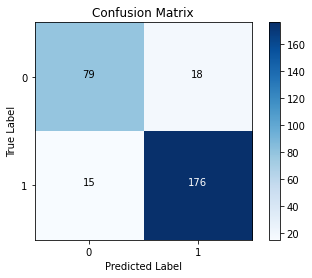

In [326]:
#Confusion Matrix for MLP 

def show_cm(y_test, nn_pred, class_names=None, model_name=None):

  cf = confusion_matrix(y_test, nn_pred)
  plt.imshow(cf, cmap=plt.cm.Blues)

  if model_name:
    plt.title("Confusion Matrix: {}".format(model_name))
  else:
    plt.title("Confusion Matrix")
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")

  if class_names:
    tick_marks = np.arrange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
  else:
    class_names = set(y_test)
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)

  thresh = cf.max() / 2.0

  for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
    plt.text(j, i, cf[i, j], horizontalalignment="center", color="white" 
             if cf[i,j] > thresh else "black",)
    
  plt.colorbar()

show_cm(y_test, nn_pred)


In [327]:
#ROC Curve for MLP

def get_auc_scores(nn, x_train, x_test, y_train, y_test):
  y_train_score = nn.predict_proba(x_train)[:, 1]
  y_test_score = nn.predict_proba(x_test)[:, 1]

  auc_train = roc_auc_score(y_train, y_train_score)
  auc_test = roc_auc_score(y_test, y_test_score)

  print("Training AUC: ", auc_train)
  print("Testing AUC: ", auc_test)
  
  return y_test_score

def plot_roc_curve(y_test, y_test_score):
  fpr, tpr, _ = roc_curve(y_test, y_test_score)
  roc_auc = auc(fpr, tpr)

  plt.figure()
  plt.plot(fpr, tpr, label="ROC curve (area = %0.2f)" % roc_auc)
  plt.plot([0, 1], [0, 1], "k-")
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.title("Receiver Operating Characteristic Curve")
  plt.legend(loc="lower right")
  plt.show()


Training AUC:  0.9999705853515051
Testing AUC:  0.9428401791979274


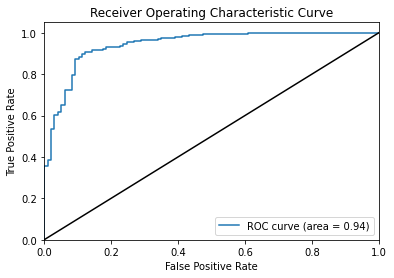

In [328]:
plot_roc_curve(y_test, get_auc_scores(nn, x_train, x_test, y_train, y_test))

In [359]:
# Grid Searching for Hyperparameter Tuning

parameters = {'solver': ['lbfgs', 'adam'], 'max_iter': [1000,1500,1600,1700,2000], 'hidden_layer_sizes':np.arange(5, 15), 
              'activation': ['relu', 'logistic, tanh']}

nn_grid = GridSearchCV(MLPClassifier(), parameters, n_jobs=-1, cv=10)
nn_grid.fit (x_train, y_train)

print("Best Parameters: ", nn_grid.best_params_)
print("Best Score: ", nn_grid.best_score_)

Best Parameters:  {'activation': 'relu', 'hidden_layer_sizes': 11, 'max_iter': 1700, 'solver': 'lbfgs'}
Best Score:  0.8654454997738579


### ANN after Grid Searching

In [330]:
nn_best = MLPClassifier(activation='relu', hidden_layer_sizes=14,max_iter=1700, solver='lbfgs')

nn_best.fit(x_train, y_train)
nn_best_pred = nn_best.predict(x_test)


Evaluation Metrics

In [331]:
# Classification Report

print("Classification Report: ", classification_report(y_test, nn_best_pred))
print("Accuracy: ", accuracy_score(y_test, nn_best_pred))

Classification Report:                precision    recall  f1-score   support

           0       0.76      0.80      0.78        97
           1       0.90      0.87      0.88       191

    accuracy                           0.85       288
   macro avg       0.83      0.84      0.83       288
weighted avg       0.85      0.85      0.85       288

Accuracy:  0.8472222222222222


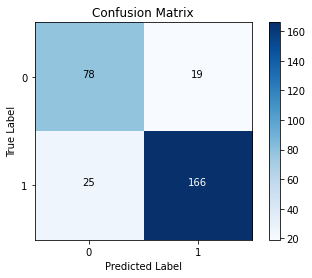

In [332]:
#Confusion Matrix  

def show_cm(y_test, nn_best_pred, class_names=None, model_name=None):

  cf = confusion_matrix(y_test, nn_best_pred)
  plt.imshow(cf, cmap=plt.cm.Blues)

  if model_name:
    plt.title("Confusion Matrix: {}".format(model_name))
  else:
    plt.title("Confusion Matrix")
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")

  if class_names:
    tick_marks = np.arrange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
  else:
    class_names = set(y_test)
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)

  thresh = cf.max() / 2.0

  for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
    plt.text(j, i, cf[i, j], horizontalalignment="center", color="white" 
             if cf[i,j] > thresh else "black",)
    
  plt.colorbar()

show_cm(y_test, nn_best_pred)


In [333]:
#ROC Curve 

def get_auc_scores(nn_best, x_train, x_test, y_train, y_test):
  y_train_score = nn_best.predict_proba(x_train)[:, 1]
  y_test_score = nn_best.predict_proba(x_test)[:, 1]

  auc_train = roc_auc_score(y_train, y_train_score)
  auc_test = roc_auc_score(y_test, y_test_score)

  print("Training AUC: ", auc_train)
  print("Testing AUC: ", auc_test)
  
  return y_test_score

def plot_roc_curve(y_test, y_test_score):
  fpr, tpr, _ = roc_curve(y_test, y_test_score)
  roc_auc = auc(fpr, tpr)

  plt.figure()
  plt.plot(fpr, tpr, label="ROC curve (area = %0.2f)" % roc_auc)
  plt.plot([0, 1], [0, 1], "k-")
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.title("Receiver Operating Characteristic Curve")
  plt.legend(loc="lower right")
  plt.show()


Training AUC:  1.0
Testing AUC:  0.8891887515517892


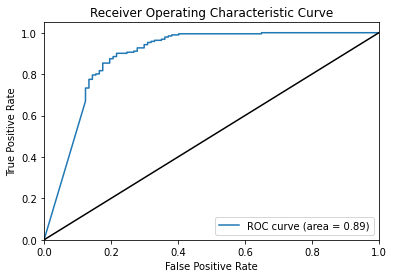

In [334]:
plot_roc_curve(y_test, get_auc_scores(nn_best, x_train, x_test, y_train, y_test))

### SVC

In [335]:
svc = SVC(probability=True)

svc.fit(x_train, y_train)
svc_pred = svc.predict(x_test)

Evaluation Metrics:

In [336]:
# Classification Report

print("Classification Report: ", classification_report(y_test, svc_pred))
print("Accuracy: ", accuracy_score(y_test, svc_pred))

#Misclassified samples
misclassified_count = (y_test != svc_pred).sum()
print("Misclassified samples: ", misclassified_count)

Classification Report:                precision    recall  f1-score   support

           0       0.92      0.70      0.80        97
           1       0.86      0.97      0.91       191

    accuracy                           0.88       288
   macro avg       0.89      0.83      0.85       288
weighted avg       0.88      0.88      0.87       288

Accuracy:  0.8784722222222222
Misclassified samples:  35


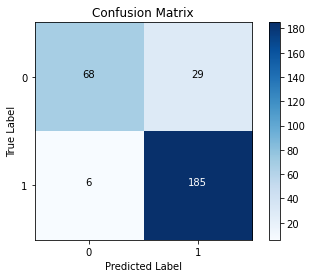

In [337]:
#Confusion Matrix for SVC 

def show_cm(y_test, svc_pred, class_names=None, model_name=None):

  cf = confusion_matrix(y_test, svc_pred)
  plt.imshow(cf, cmap=plt.cm.Blues)

  if model_name:
    plt.title("Confusion Matrix: {}".format(model_name))
  else:
    plt.title("Confusion Matrix")
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")

  if class_names:
    tick_marks = np.arrange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
  else:
    class_names = set(y_test)
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)

  thresh = cf.max() / 2.0

  for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
    plt.text(j, i, cf[i, j], horizontalalignment="center", color="white" 
             if cf[i,j] > thresh else "black",)
    
  plt.colorbar()

show_cm(y_test, svc_pred)


In [338]:
#ROC Curve for SVC

def get_auc_scores(svc, x_train, x_test, y_train, y_test):
  y_train_score = svc.predict_proba(x_train)[:, 1]
  y_test_score = svc.predict_proba(x_test)[:, 1]

  auc_train = roc_auc_score(y_train, y_train_score)
  auc_test = roc_auc_score(y_test, y_test_score)

  print("Training AUC: ", auc_train)
  print("Testing AUC: ", auc_test)
  
  return y_test_score

def plot_roc_curve(y_test, y_test_score):
  fpr, tpr, _ = roc_curve(y_test, y_test_score)
  roc_auc = auc(fpr, tpr)

  plt.figure()
  plt.plot(fpr, tpr, label="ROC curve (area = %0.2f)" % roc_auc)
  plt.plot([0, 1], [0, 1], "k-")
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.title("Receiver Operating Characteristic Curve")
  plt.legend(loc="lower right")
  plt.show()


Training AUC:  0.9903912148249828
Testing AUC:  0.9525557294759001


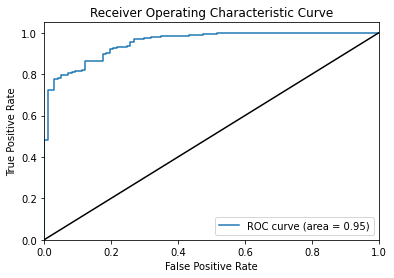

In [339]:
plot_roc_curve(y_test, get_auc_scores(svc, x_train, x_test, y_train, y_test))

Grid Searching for SVC

In [355]:
# Grid Searching for Hyperparameter Tuning

parameters = {'kernel': ['linear', 'poly', 'rbf'], 'C': [1, 10, 100], 'degree': [1, 2, 3],'decision_function_shape': ['ovo', 'ovr']}

svc_grid = GridSearchCV(SVC(), parameters, cv=5)
svc_grid.fit (x_train, y_train)

print("Best Parameters: ", svc_grid.best_params_)
print("Best Score: ", svc_grid.best_score_)

Best Parameters:  {'C': 100, 'decision_function_shape': 'ovo', 'degree': 1, 'kernel': 'rbf'}
Best Score:  0.9626416788239256


### SVC after Grid Searching 


In [360]:
svc_best = SVC(kernel='rbf', C=100, decision_function_shape='ovo', degree=1, probability=True)

svc_best.fit(x_train, y_train)
svc_best_pred = svc_best.predict(x_test)

Evaluation Metrics

In [361]:
# Classification Report

print("Classification Report: ", classification_report(y_test, svc_best_pred))
print("Accuracy: ", accuracy_score(y_test, svc_best_pred))

# Misclassified samples
misclassified_count = (y_test != svc_best_pred).sum()
print("Misclassified samples: ", misclassified_count)

Classification Report:                precision    recall  f1-score   support

           0       1.00      0.99      0.99        97
           1       0.99      1.00      1.00       191

    accuracy                           1.00       288
   macro avg       1.00      0.99      1.00       288
weighted avg       1.00      1.00      1.00       288

Accuracy:  0.9965277777777778
Misclassified samples:  1


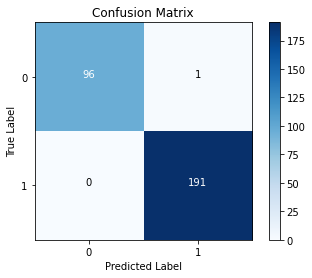

In [362]:
#Confusion Matrix for SVC 

def show_cm(y_test, svc_best_pred, class_names=None, model_name=None):

  cf = confusion_matrix(y_test, svc_best_pred)
  plt.imshow(cf, cmap=plt.cm.Blues)

  if model_name:
    plt.title("Confusion Matrix: {}".format(model_name))
  else:
    plt.title("Confusion Matrix")
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")

  if class_names:
    tick_marks = np.arrange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
  else:
    class_names = set(y_test)
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)

  thresh = cf.max() / 2.0

  for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
    plt.text(j, i, cf[i, j], horizontalalignment="center", color="white" 
             if cf[i,j] > thresh else "black",)
    
  plt.colorbar()

show_cm(y_test, svc_best_pred)


In [363]:
#ROC Curve for SVC

def get_auc_scores(svc_best, x_train, x_test, y_train, y_test):
  y_train_score = svc_best.predict_proba(x_train)[:, 1]
  y_test_score = svc_best.predict_proba(x_test)[:, 1]

  auc_train = roc_auc_score(y_train, y_train_score)
  auc_test = roc_auc_score(y_test, y_test_score)

  print("Training AUC: ", auc_train)
  print("Testing AUC: ", auc_test)
  
  return y_test_score

def plot_roc_curve(y_test, y_test_score):
  fpr, tpr, _ = roc_curve(y_test, y_test_score)
  roc_auc = auc(fpr, tpr)

  plt.figure()
  plt.plot(fpr, tpr, label="ROC curve (area = %0.2f)" % roc_auc)
  plt.plot([0, 1], [0, 1], "k-")
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.title("Receiver Operating Characteristic Curve")
  plt.legend(loc="lower right")
  plt.show()


In [364]:
plot_roc_curve(y_test, get_auc_scores(svc_best, x_train, x_test, y_train, y_test))

Training AUC:  1.0
Testing AUC:  1.0


TypeError: ignored

In [365]:
#Cross validation 

#accuracy
cv_accuracy = cross_val_score(svc_best, x, y, cv=10)
print("Cross validation accuracy: ", cv_accuracy.mean())

#AUC
cv_auc = cross_val_score(svc_best, x, y, cv=10, scoring='roc_auc')
print("Cross validation AUC: ", cv_auc)

#Recall
cv_recall = cross_val_score(svc_best, x, y, cv=10, scoring='recall')
print("Cross validation recall: ", cv_recall)


Cross validation accuracy:  0.9425328947368421
Cross validation AUC:  [0.87397787 0.98893699 1.         0.998076   1.         1.
 0.99810247 1.         1.         1.        ]
Cross validation recall:  [0.57142857 0.96825397 1.         0.98412698 1.         0.96774194
 1.         1.         1.         1.        ]


### Comparison Between All Models

In [366]:
#display all metrics in a pretty table

table = PrettyTable()

table.field_names = ["Model", "Accuracy", "AUC"]

models = [DecisionTreeClassifier(criterion='entropy'),
          DecisionTreeClassifier(criterion='gini'),
          RandomForestClassifier(criterion='entropy'),
          RandomForestClassifier(criterion='gini'),
          KNeighborsClassifier(n_neighbors=6),
          MLPClassifier(max_iter=1000, random_state=1),
          nn_best,
          SVC(probability=True),
          svc_best         
]

#Defining AUC Score ROC Curve for Decision Tree

def get_auc_score(clf, x_train, x_test, y_train, y_test):
  y_train_score = clf.predict_proba(x_train)[:, 1]
  y_test_score = clf.predict_proba(x_test)[:, 1]

  auc_train = roc_auc_score(y_train, y_train_score)
  auc_test = roc_auc_score(y_test, y_test_score)

  return auc_test


for model in models:
  model.fit(x_train, y_train)
  y_res = model.predict(x_test)
  accuracy = accuracy_score(y_test, y_res)
  auc = get_auc_score(model, x_train, x_test, y_train, y_test)
  
  table.add_row([type(model).__name__, accuracy, auc])
  
print(table)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


+------------------------+--------------------+--------------------+
|         Model          |      Accuracy      |        AUC         |
+------------------------+--------------------+--------------------+
| DecisionTreeClassifier |      0.90625       | 0.898877314190101  |
| DecisionTreeClassifier |      0.90625       | 0.8938036379338263 |
| RandomForestClassifier | 0.9444444444444444 | 0.9957089652938954 |
| RandomForestClassifier | 0.9583333333333334 | 0.9958439034922006 |
|  KNeighborsClassifier  | 0.8298611111111112 | 0.8313542397581907 |
|     MLPClassifier      | 0.8854166666666666 | 0.9428401791979274 |
|     MLPClassifier      | 0.8229166666666666 | 0.8761807092351703 |
|          SVC           | 0.8784722222222222 | 0.9525557294759001 |
|          SVC           | 0.9965277777777778 |        1.0         |
+------------------------+--------------------+--------------------+


### Final Conclusion: 

Best Model: SVC Classifier with parameters found from Grid Searching